In [1]:
from investesg import InvestESG

In [2]:
env = InvestESG(num_companies=3, num_investors=3)

In [3]:
env.climate_event_probability

0.1

# Testing random actions

In [4]:
# 1. Sample random actions
company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
print(company_actions)
investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
print(investor_actions)

actions = {**company_actions, **investor_actions}
print(actions)

{'company_0': 0, 'company_1': 0, 'company_2': 1}
{'investor_0': array([0, 0, 0], dtype=int64), 'investor_1': array([0, 1, 1], dtype=int64), 'investor_2': array([0, 0, 1], dtype=int64)}
{'company_0': 0, 'company_1': 0, 'company_2': 1, 'investor_0': array([0, 0, 0], dtype=int64), 'investor_1': array([0, 1, 1], dtype=int64), 'investor_2': array([0, 0, 1], dtype=int64)}


In [10]:
# print initial state for a given company
id = 1
ex_company = env.companies[id]
print(ex_company.capital)
print(ex_company.esg_score)
print(ex_company.esg_invested)
print(ex_company.climate_risk_exposure)

19826.503706422118
1
0
0.5


In [6]:
# move a step forward
obs, rewards, terminations, truncations, infos = env.step(actions)

In [7]:
print(ex_company.capital)
print(ex_company.esg_score)
print(ex_company.esg_invested)
print(ex_company.climate_risk_exposure)

print(ex_company.margin)

print(env.market_performance)

26794.3209586721
0
0
0.5
0.18590426479030267
1.00418681636241


In [11]:
env.climate_event_probability

0.06722466278903014

In [3]:
env.reset()
for i in range(100):
    company_actions = {f"company_{i}": env.action_space(f"company_{i}").sample() for i in range(env.num_companies)}
    # company 0 never does anything
    company_actions['company_0'] = [0]
    investor_actions = {f"investor_{i}": env.action_space(f"investor_{i}").sample() for i in range(env.num_investors)}
    # mask such that investor 0 only invests in company 0
    investor_actions['investor_0'] = [1, 0, 0]
    actions = {**company_actions, **investor_actions}
    obs, rewards, terminations, truncations, infos = env.step(actions)

In [4]:
env.render()

<Figure size 640x480 with 0 Axes>

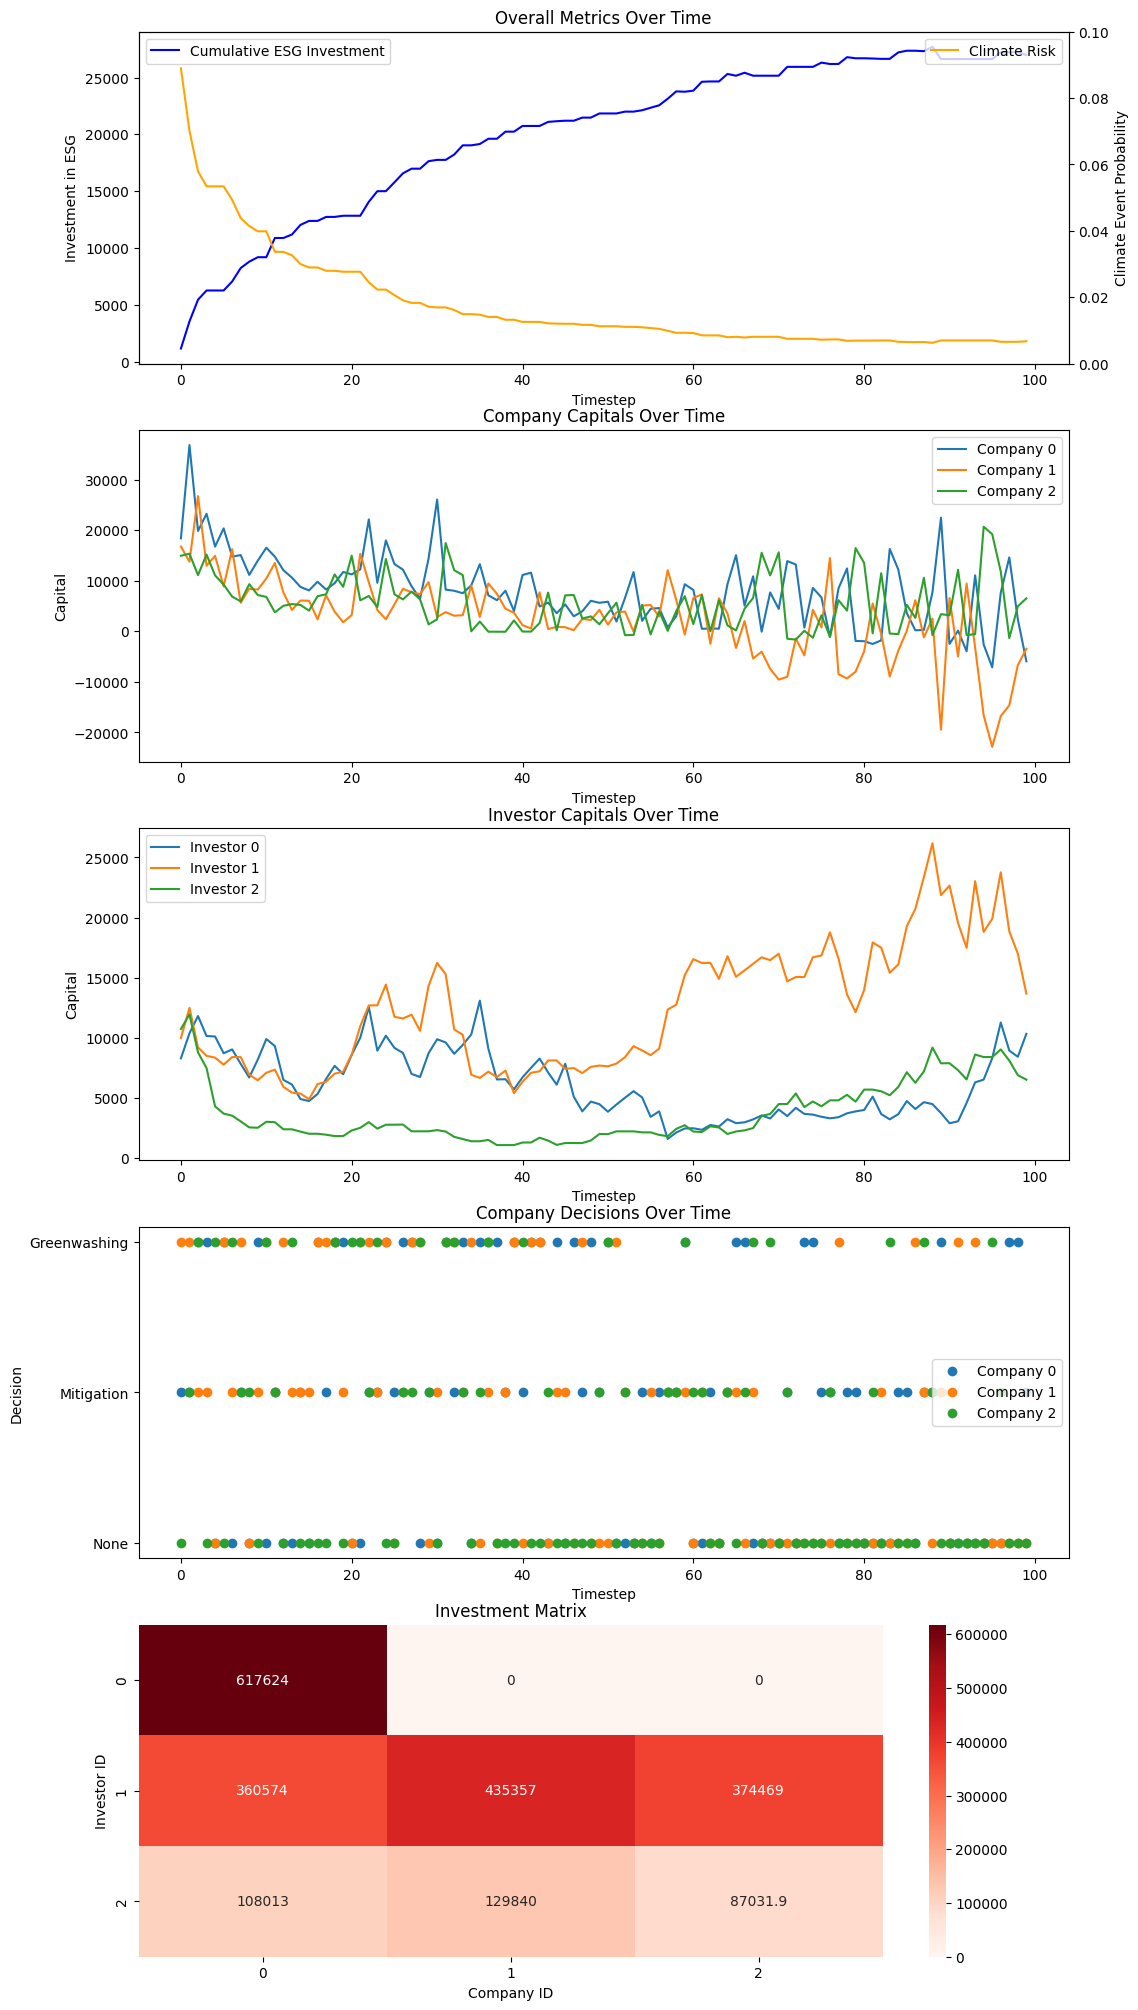

In [5]:
env.fig